In [1]:
import numpy as np
import full_method as FM
import gaussian_models as GM
import kernel_cookbook as kern
import matplotlib.pyplot as plt

In [2]:
#Import of Data
xycoords = np.loadtxt('coords.csv',delimiter = ',')
dtoa = np.loadtxt('dTOA.csv',delimiter = ',')
sensor_location_coordinates = np.loadtxt('Sensor_location_coordinates.csv', delimiter = ',')

In [3]:
#Normalising of coordinates using max/min values
x_coords = xycoords[:,0]
y_coords = xycoords[:,1]
x_normalised = (x_coords-0)/(370-0)
y_normalised = (y_coords-0)/(370-0)

#Appending normalised x and y coordinates into the same array
xy_normalised = np.column_stack((x_normalised,y_normalised))

## DEMONSTRATION OF PROCESS

In [5]:
#All code associated with sensor pair 2-8
#Data selection and standardisation- establishment of 0 mean
dtoa_28 = dtoa[:,12]
dtoa_28_standardised = FM.CholeskyGPR.output_standardise(dtoa_28)

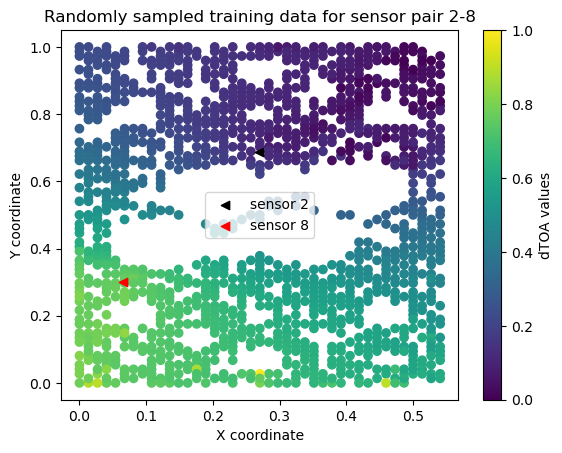

In [6]:
#Model contstruction for sensor pair 2-8
#Xy_normalised - Acoustic Emission coordinates- model input
#dTOA_28 - Difference in time of arrival values- model output
#666- Number of test point, can range from 0-2277
#100 - Number of divisions to be made along the X-axis for generation of the dense grid ->DECREASE IF STRUGGLING FOR MEMORY, BUT ACCURACY WILL SUFFER
#100- Number of divisions to be made along the Y-axis for generation of the dense grid ->DECREASE IF STRUGGLING FOR MEMORY, BUT ACCURACY WILL SUFFER 

Sensor_pair_28 = FM.likelihood_estimation(xy_normalised,dtoa_28_standardised,666,100,100)

#'random' - selection of bayesian or random sampling
#0.4 - test_size for tts
#32 -  random state
#None - beta value used for bayesian model

Sensor_pair_28_random_model = Sensor_pair_28.GaussianModel('random', 0.4, 32, None)

#Plot of randomly sampled training data for sensor pair 2-8 for comparison with the training data sampled using bayesian optimsation
plt.figure(1)
plt.title('Randomly sampled training data for sensor pair 2-8')
plt.scatter(Sensor_pair_28.X_train[:,0], Sensor_pair_28.X_train[:,1], c = Sensor_pair_28.y_train, cmap = 'viridis')
plt.colorbar(label = 'dTOA values')
plt.scatter(sensor_location_coordinates[1,0],sensor_location_coordinates[1,1], marker = '<', color = 'black',label = 'sensor 2')
plt.scatter(sensor_location_coordinates[7,0],sensor_location_coordinates[7,1],marker = '<', color = 'red',label = 'sensor 8')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.show()

#Prediction and plotting of likelihood evaluation grid for sensor pair 2-8
Sensor_pair_28_likelihood_array = Sensor_pair_28.source_localisation(Sensor_pair_28_random_model)

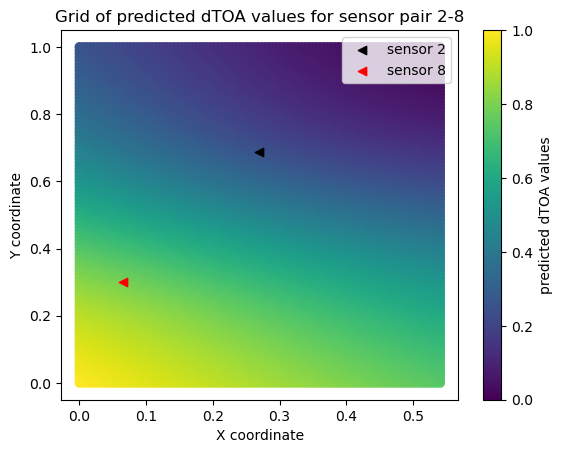

In [7]:
#Plot of dense grid of dTOA values, predicted using Gaussian Process, the grid is used for the following likelihood evaluation
plt.figure(2)
plt.title('Grid of predicted dTOA values for sensor pair 2-8')
plt.scatter(Sensor_pair_28.candidate_coordinates[:,0], Sensor_pair_28.candidate_coordinates[:,1], c = Sensor_pair_28.mu_array, cmap = 'viridis')
plt.colorbar(label = 'predicted dTOA values')
plt.scatter(sensor_location_coordinates[1,0],sensor_location_coordinates[1,1], marker = '<', color = 'black',label = 'sensor 2')
plt.scatter(sensor_location_coordinates[7,0],sensor_location_coordinates[7,1],marker = '<', color = 'red',label = 'sensor 8')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.show()

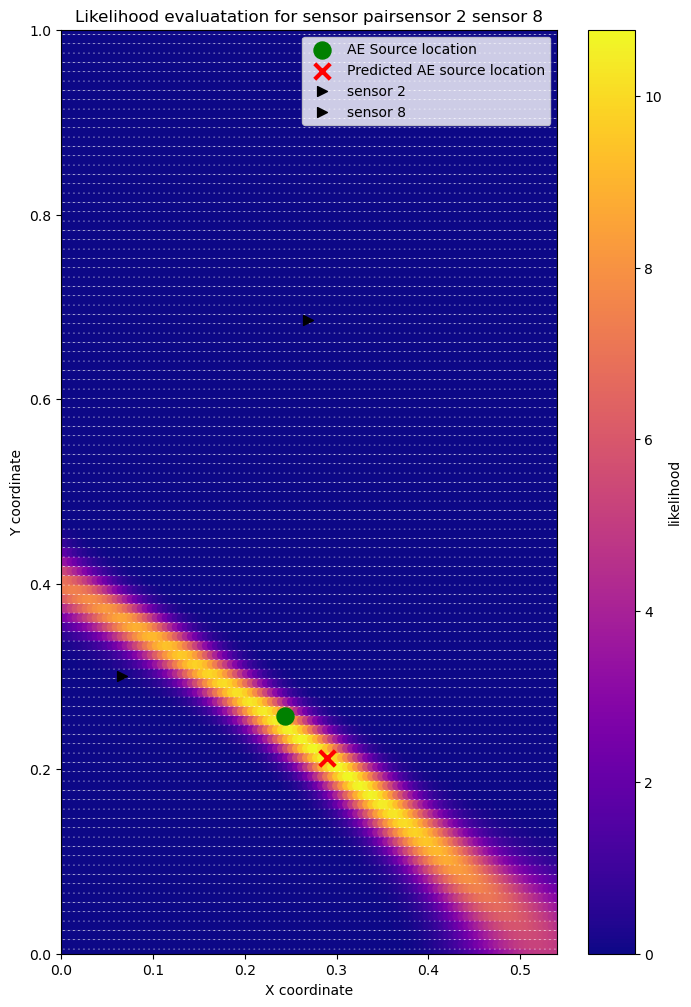

In [8]:
#Plotting of final source likelihood evaluation
Sensor_pair_28.plt_source_localisation(sensor_location_coordinates[1,:], sensor_location_coordinates[7,:], 'sensor 2 ', 'sensor 8')

The above process is then repeated across 4 more sensor pairs, before a final summation of the likelihoods is done. Certain graphs have not been plotted as figures 1 and 2 are only used to demonstrate how the method works. Figure 1 should also be compared with figure 5 (bottom) to show how data sampled using bayesian optimsation is different to randomly sampled data. This serves as evidence of how bayesian optimisation could be used in model development,to advise engineers of regions where data collection should be focused. Predictions can be made using this graph, but this is outside of the scope of this particular project.

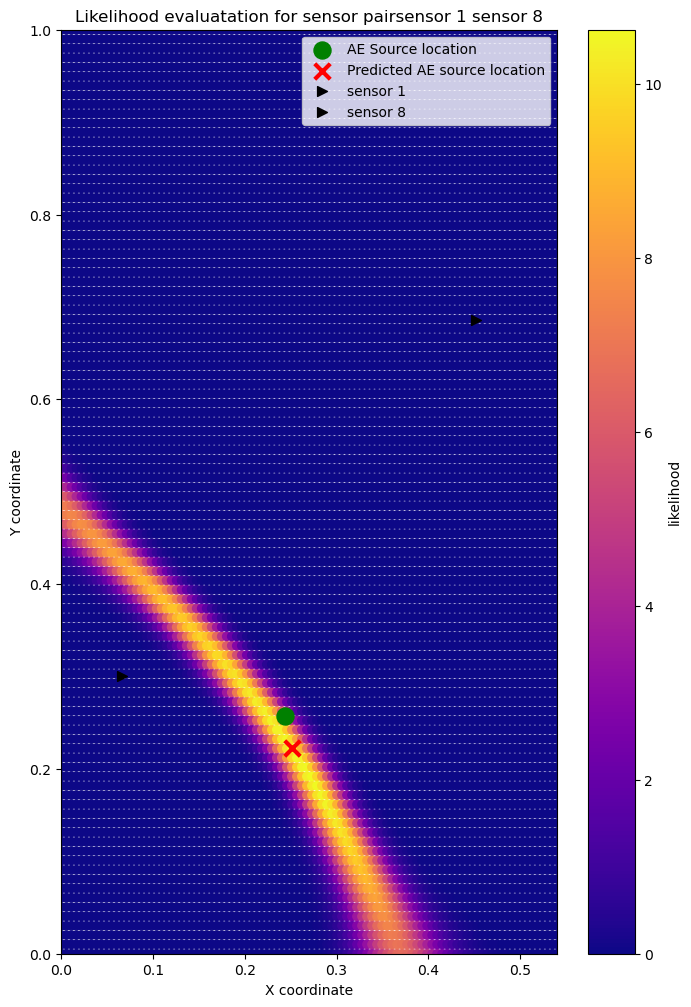

In [10]:
#All code associated with sensor pair 1-8
#Data selection and standardisation- establishment of 0 mean, assumption required for model
dtoa_18 = dtoa[:,6]
dtoa_18_standardised = FM.CholeskyGPR.output_standardise(dtoa_18)

#Model contstruction for sensor pair 1-8
Sensor_pair_18 = FM.likelihood_estimation(xy_normalised,dtoa_18_standardised,666,100,100)
Sensor_pair_18_random_model = Sensor_pair_18.GaussianModel('random', 0.4, 33, 15)

#Prediction and plotting of likelihood evaluation across grid for sensor pair 1-8
Sensor_pair_18_likelihood_array = Sensor_pair_18.source_localisation(Sensor_pair_18_random_model)
Sensor_pair_18.plt_source_localisation(sensor_location_coordinates[0,:], sensor_location_coordinates[7,:], 'sensor 1 ', 'sensor 8')

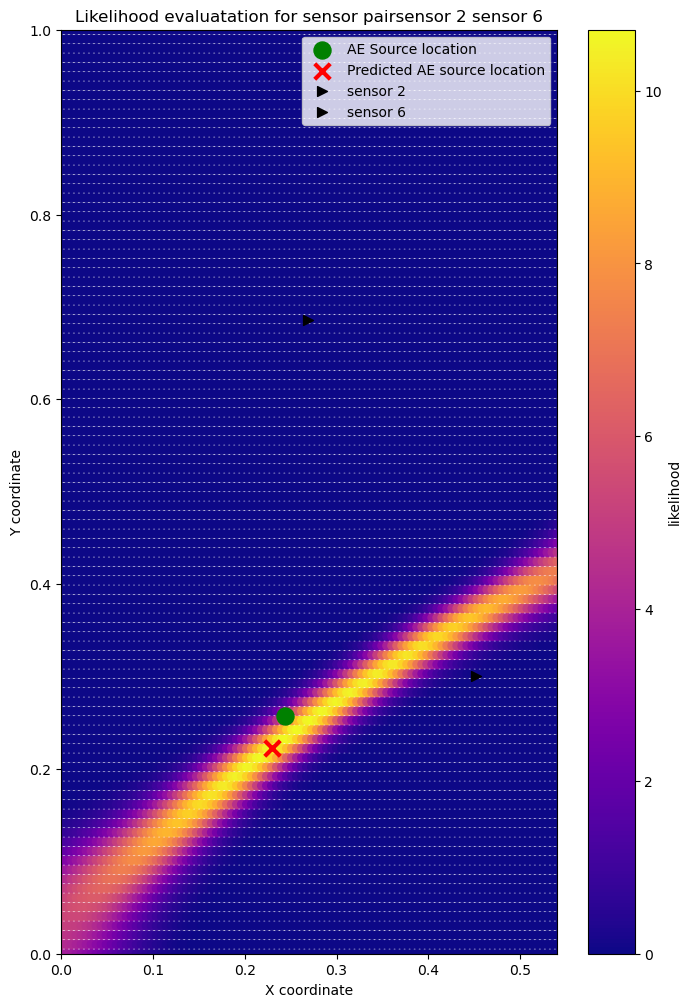

In [11]:
#All code associated with sensor pair 2-6
#Data selection and standardisation- establishment of 0 mean
dtoa_26 = dtoa[:,10]
dtoa_26_standardised = FM.CholeskyGPR.output_standardise(dtoa_26)

#Model contstruction for sensor pair 2-6
Sensor_pair_26 = FM.likelihood_estimation(xy_normalised,dtoa_26_standardised,666,100,100)
Sensor_pair_26_random_model = Sensor_pair_26.GaussianModel('random', 0.4, 321, 15)

#Prediction and plotting of likelihood evaluation across grid for sensor pair 2-6
Sensor_pair_26_likelihood_array = Sensor_pair_26.source_localisation(Sensor_pair_26_random_model)
Sensor_pair_26.plt_source_localisation(sensor_location_coordinates[1,:], sensor_location_coordinates[5,:], 'sensor 2 ', 'sensor 6')

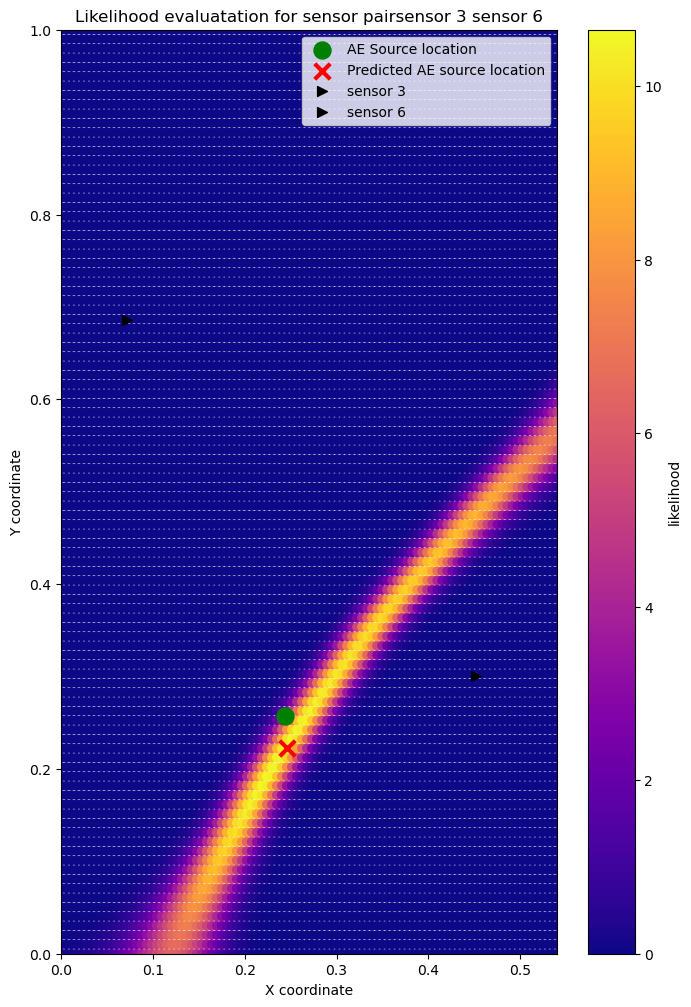

In [12]:
#All code associated with sensor pair 3-6
#Data selection and standardisation- establishment of 0 mean
dtoa_36 = dtoa[:,15]
dtoa_36_standardised = FM.CholeskyGPR.output_standardise(dtoa_36)

#Model contstruction for sensor pair 3-6
Sensor_pair_36 = FM.likelihood_estimation(xy_normalised,dtoa_36_standardised,666,100,100)
Sensor_pair_36_random_model = Sensor_pair_36.GaussianModel('random', 0.4, 79, 15)

#Prediction and plotting of likelihood evaluation across grid for sensor pair 3-6
Sensor_pair_36_likelihood_array = Sensor_pair_36.source_localisation(Sensor_pair_36_random_model)
Sensor_pair_36.plt_source_localisation(sensor_location_coordinates[2,:], sensor_location_coordinates[5,:], 'sensor 3 ', 'sensor 6')

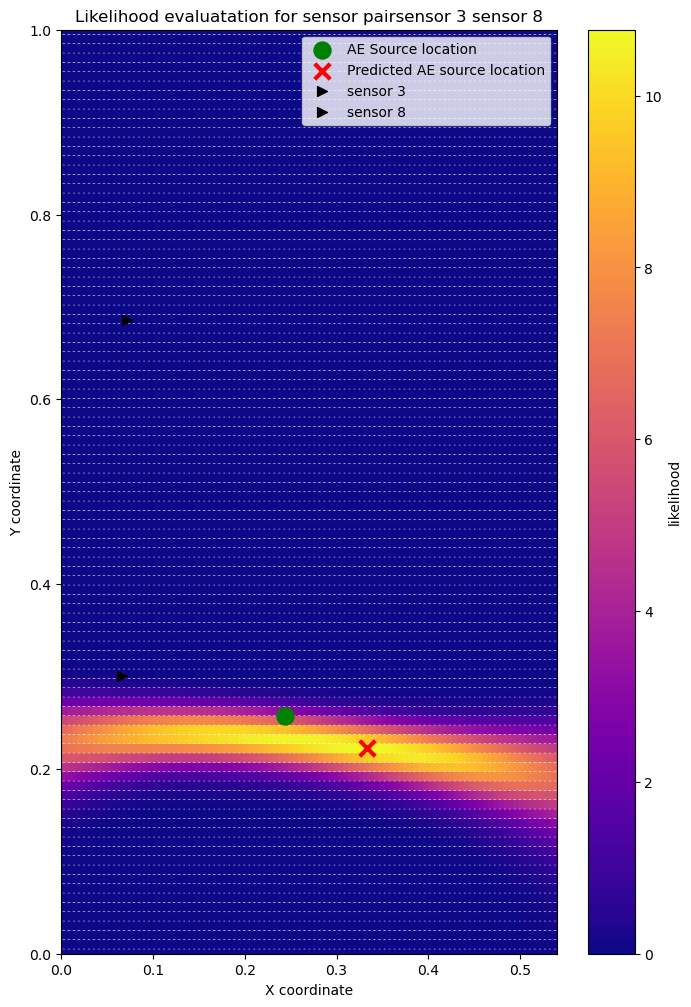

In [13]:
#All code associated with sensor pair 3-8
#Data selection and standardisation- establishment of 0 mean
dtoa_38 = dtoa[:,17]
dtoa_38_standardised = FM.CholeskyGPR.output_standardise(dtoa_38)

#Model contstruction for sensor pair 3-8
Sensor_pair_38 = FM.likelihood_estimation(xy_normalised,dtoa_38_standardised,666,100,100)
Sensor_pair_38_random_model = Sensor_pair_38.GaussianModel('random', 0.4, 64, 15)

#Prediction and plotting of likelihood evaluation across grid for sensor pair 3-8
Sensor_pair_38_likelihood_array = Sensor_pair_38.source_localisation(Sensor_pair_38_random_model)
Sensor_pair_38.plt_source_localisation(sensor_location_coordinates[2,:], sensor_location_coordinates[7,:], 'sensor 3 ', 'sensor 8')

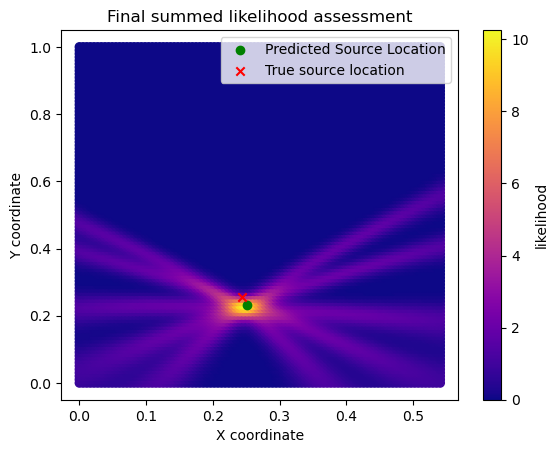

In [33]:
#Plot of final summed likelihood array for source localisation
full_likelihood = FM.sum_arrays(Sensor_pair_38_likelihood_array,Sensor_pair_36_likelihood_array,Sensor_pair_28_likelihood_array,Sensor_pair_26_likelihood_array,Sensor_pair_18_likelihood_array)

plt.figure(4)
plt.title('Final summed likelihood assessment')
plt.scatter(Sensor_pair_38.candidate_coordinates[:,0], Sensor_pair_38.candidate_coordinates[:,1], c = full_likelihood, cmap = 'plasma')
plt.colorbar(label = 'likelihood')
plt.scatter(Sensor_pair_38.candidate_coordinates[np.argmax(full_likelihood),0], Sensor_pair_38.candidate_coordinates[np.argmax(full_likelihood),1], marker = 'o', color = 'g', label = 'Predicted Source Location')
plt.scatter(Sensor_pair_38.test_coordinate[0], Sensor_pair_38.test_coordinate[1], marker = 'x', color = 'r', label = 'True source location')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.show()

In [15]:
#Determination of RMSE for prediction
print('Final RMSE value for source prediction', GM.rmse(Sensor_pair_28.test_coordinate,Sensor_pair_28.candidate_coordinates[np.argmax(full_likelihood),:]))

Final RMSE value for source prediction 0.018161444471759398


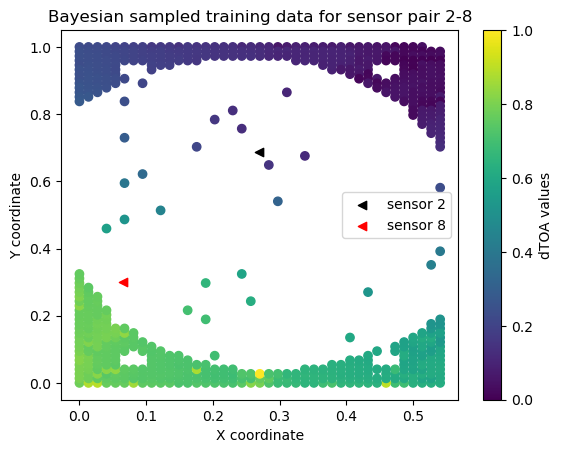

In [16]:
#Determination of best training sample using bayesian sampling

Sensor_pair_28_bayesian = FM.likelihood_estimation(xy_normalised,dtoa_28_standardised,666,100,100)
Sensor_pair_28_bayesian_model = Sensor_pair_28_bayesian.GaussianModel('bayesian', 0.7, 67, 32.55)

#Ploting of training sample generated using bayesian sampling
plt.figure(5)
plt.title('Bayesian sampled training data for sensor pair 2-8')
plt.scatter(Sensor_pair_28_bayesian.X_train[:,0], Sensor_pair_28_bayesian.X_train[:,1], c = Sensor_pair_28_bayesian.y_train, cmap = 'viridis')
plt.colorbar(label = 'dTOA values')
plt.scatter(sensor_location_coordinates[1,0],sensor_location_coordinates[1,1], marker = '<', color = 'black',label = 'sensor 2')
plt.scatter(sensor_location_coordinates[7,0],sensor_location_coordinates[7,1],marker = '<', color = 'red',label = 'sensor 8')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.show()